In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [2]:
length_sample = 100 #2000

In [4]:
folder_path = "/vol/aimspace/users/dena/Documents/mae/data/lemon"

data_raw_test = torch.load(os.path.join(folder_path, "data_raw_test.pt"))
data_raw_train = torch.load(os.path.join(folder_path, "data_raw_train.pt"))
data_raw_val = torch.load(os.path.join(folder_path, "data_raw_val.pt"))

# labels_raw_test = torch.load(os.path.join(folder_path, "labels_raw_test.pt"))
# labels_raw_train = torch.load(os.path.join(folder_path, "labels_raw_train.pt"))
# labels_raw_val = torch.load(os.path.join(folder_path, "labels_raw_val.pt"))

folder_path_classification = "/vol/aimspace/users/dena/Documents/ad_benchmarking/ad_benchmarking/data"
labels_raw_train = torch.load(os.path.join(folder_path_classification, "labels_bin_train.pt"))
labels_raw_val = torch.load(os.path.join(folder_path_classification, "labels_bin_val.pt"))
labels_raw_test = torch.load(os.path.join(folder_path_classification, "labels_bin_test.pt"))

In [10]:
class EEGDataset(Dataset):
    def __init__(self, X, y, number_samples=None):
        if number_samples: 
            indices = np.random.choice(range(len(X[0])), number_samples, replace=False)
            self.X = X[indices]
            self.y = y[indices]
        else: 
            self.X = X
            self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):

        # get random starting point
        last_useful_index = self.X.shape[-1]-length_sample
        index = np.random.randint(0,last_useful_index)

        # get 2000 timesteps long data 
        participant_trials = self.X[idx][:,index:index+length_sample]
        label = self.y[idx]
        return participant_trials, label


train_dataset = EEGDataset(data_raw_train, labels_raw_train) #, h_params["number_samples"]) #, number_samples=32) #!!! CHANGE AGAIN!! 
val_dataset = EEGDataset(data_raw_val, labels_raw_val) #, h_params["number_samples"]) #, number_samples=32) #!!! CHANGE AGAIN!! 
test_dataset = EEGDataset(data_raw_test, labels_raw_test) #, h_params["number_samples"]) #, number_samples=32) #!!! CHANGE AGAIN!! 

0
torch.Size([61, 100])
torch.Size([1])


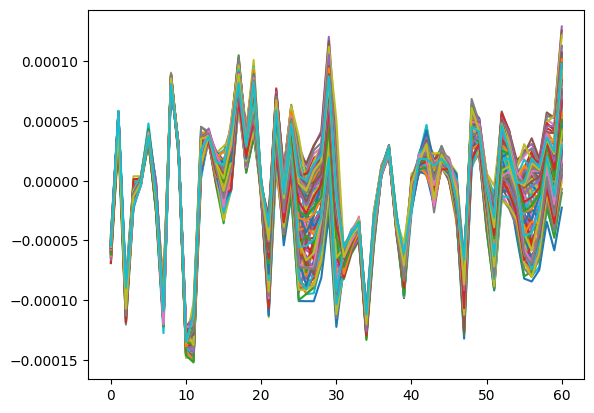

In [22]:
# import matplotlib.pyplot as plt

# for data in enumerate(train_dataset): 
#     index = data[0]
#     X = data[1][0]
#     y = data[1][1]

#     print(index)
#     print(X.shape)
#     print(y.shape) 
#     plt.plot(X)
#     break